In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib
from scipy.stats import spearmanr

In [2]:
DATA_PATH = os.getcwd() + "/../data/processed/"
EXPORT_PATH = os.getcwd() + "/../figures/"

In [3]:
# conditionの読み込み
conditions = pd.read_excel(DATA_PATH + "BW25113_Growth_Condition.xlsx")

In [5]:
# Description列を削除
conditions = conditions.iloc[:,:-3]
conditions

,Label,Assay ID,Condition ID,K2HPO4\n(mM),KH2PO4\n(mM),Na2HPO4\n(mM),Glucose\n(mM),(NH4)2SO4\n(mM),NH4Cl\n(mM),Alanine\n(mM),...,Thiamine/HCl\n(mM),Pyridoxine\n(mM),FolicAcid\n(mM),Riboflavin\n(mM),H3BO3\n(mM),AminobenzoicAcid\n(mM),K,r,K_info,r_info
0,Curve00001,Round01_0001,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
1,Curve00002,Round01_0002,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
2,Curve00003,Round01_0003,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
3,Curve00004,Round01_0004,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
4,Curve00005,Round01_0005,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,Curve13604,Round07_0776,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.900767,1.271960,3,0
13604,Curve13605,Round07_0777,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.822767,1.371001,0,0
13605,Curve13606,Round07_0778,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.878433,1.367386,0,0
13606,Curve13607,Round07_0779,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.810767,1.328450,0,0


In [6]:
# 析出削除verのconditionの読み込み
conditions_drop = pd.read_excel(DATA_PATH + "BW25113_Growth_Condition_析出curve削除.xlsx")

In [7]:
# Description列を削除
conditions_drop = conditions_drop.iloc[:,:-3]
conditions_drop

,Label,Assay ID,Condition ID,K2HPO4\n(mM),KH2PO4\n(mM),Na2HPO4\n(mM),Glucose\n(mM),(NH4)2SO4\n(mM),NH4Cl\n(mM),Alanine\n(mM),...,Thiamine/HCl\n(mM),Pyridoxine\n(mM),FolicAcid\n(mM),Riboflavin\n(mM),H3BO3\n(mM),AminobenzoicAcid\n(mM),K,r,K_info,r_info
0,Curve00001,Round01_0001,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
1,Curve00002,Round01_0002,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
2,Curve00003,Round01_0003,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
3,Curve00004,Round01_0004,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
4,Curve00005,Round01_0005,Cond00001,0.0615,22.0000,42.30,2.00,1.000,1.0,0.02,...,0.001,0.0020,0.000050,0.00050,0.008,0.0010,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,Curve13604,Round07_0776,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.900767,1.271960,3,0
13604,Curve13605,Round07_0777,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.822767,1.371001,0,0
13605,Curve13606,Round07_0778,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.878433,1.367386,0,0
13606,Curve13607,Round07_0779,Cond01021,0.0615,23.7985,50.76,43.42,0.015,3.1,0.48,...,0.020,0.0028,0.000135,0.00155,0.312,0.0029,0.810767,1.328450,0,0


In [8]:
def merge_excel_files(folder_path, drop=False):
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]
    data_dict = {}
    
    for file in all_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path, index_col=0)
        df = df.dropna(how="all")
        #df = df.dropna(axis=1, how="all")
        if drop:
            key = file.rsplit("_")[-2].split(".")[0]
        else:
            key = file.rsplit("_")[-1].split(".")[0]
        data_dict[key] = df
    return data_dict

In [9]:
# 曲線データの読み込み
curve_set = merge_excel_files(DATA_PATH + "curves/")

In [11]:
allcurve = pd.DataFrame()
for roundkey in curve_set:
    allcurve = pd.concat([allcurve, curve_set[roundkey]],axis=1)

In [13]:
# 析出削除verの曲線データの読み込み
curve_set_drop = merge_excel_files(DATA_PATH + "curves_析出削除/", drop=True)

In [14]:
allcurve_drop = pd.DataFrame()
for roundkey in curve_set_drop:
    allcurve_drop = pd.concat([allcurve_drop, curve_set_drop[roundkey]],axis=1)

In [18]:
allcurve_drop

,Curve12829,Curve12830,Curve12831,Curve12832,Curve12833,Curve12834,Curve12835,Curve12836,Curve12837,Curve12838,...,Curve13599,Curve13600,Curve13601,Curve13602,Curve13603,Curve13604,Curve13605,Curve13606,Curve13607,Curve13608
Time (h),,,,,,,,,,,,,,,,,,,,,
0.5,0.084,0.084,0.084,0.083,0.085,0.085,0.083,0.084,0.092,0.083,...,0.083,0.085,0.084,0.083,0.085,0.084,0.083,0.085,0.083,0.084
1.0,0.084,0.084,0.083,0.083,0.085,0.086,0.083,0.084,0.092,0.083,...,0.084,0.085,0.085,0.084,0.086,0.085,0.084,0.085,0.083,0.085
1.5,0.084,0.084,0.083,0.083,0.084,0.086,0.083,0.084,0.092,0.083,...,0.084,0.086,0.085,0.084,0.086,0.085,0.084,0.085,0.084,0.085
2.0,0.084,0.084,0.083,0.083,0.084,0.086,0.083,0.084,0.092,0.083,...,0.085,0.086,0.086,0.084,0.086,0.085,0.084,0.086,0.084,0.085
2.5,0.084,0.084,0.083,0.083,0.085,0.086,0.083,0.084,0.092,0.083,...,0.085,0.086,0.086,0.084,0.086,0.085,0.084,0.085,0.084,0.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 曲線の描写

In [19]:
def set_font():
    # fontの設定
    plt.rcParams['font.size'] = 12
    plt.rcParams['font.family']= 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
        
def plot_curves(roundID, conditionID, average=False, export_path=EXPORT_PATH):
    conditions_round = conditions[conditions["Assay ID"].str.startswith(roundID)]
    curve_labels = conditions_round[conditions_round["Condition ID"]==conditionID]["Label"].values
    try:
        curves = curve_set[roundID][curve_labels]
    except KeyError as e:
        print(f"KeyError:{e}, {conditionID}")
        curve_labels = list(set(curve_set[roundID].columns)&set(curve_labels))
        curves = curve_set[roundID][curve_labels]
    
    fig, ax = plt.subplots(figsize=(2,2), dpi=200)
    set_font()
    plt.xlabel("Time (h)")
    plt.ylabel("$\mathrm{OD_{600}}$ (a.u.)")
    for curve_id in curves.columns:
        curve = curves[curve_id]
        plot_curve(curve)
    
    if average:
        plot_average_curve(curves)
        plt.savefig(export_path+f"{conditionID}_on_average_curve", bbox_inches="tight")
        plt.close()
    
    else:
        plt.savefig(export_path+f"{conditionID}",bbox_inches="tight")
        plt.close()
        
def plot_curve(series, color="grey",alpha=0.5):
    plt.plot(series, color=color,alpha=alpha)
    
def plot_average_curve(curves):
    average_curve = curves.mean(axis=1)
    plot_curve(average_curve, color="tab:blue", alpha=1)

In [20]:
# C00012の曲線をプロット
plot_curves("Round01","Cond00012")

In [21]:
# C00012の曲線をプロット（平均の曲線を描写）
plot_curves("Round01", "Cond00012",average=True)

In [22]:
def plot_example_curves(roundID, conditionID, export_path=EXPORT_PATH):
    conditions_round = conditions[conditions["Assay ID"].str.startswith(roundID)]
    curve_labels = conditions_round[conditions_round["Condition ID"]==conditionID]["Label"].values
    curves = curve_set[roundID][curve_labels]
    fig, ax = plt.subplots(figsize=(1.5,1.5), dpi=200)
    ax.tick_params(bottom=False, left=False, labelbottom=False,labelleft=False)
    for curve_id in curves.columns:
        curve = curves[curve_id]
        plot_curve(curve)
    plt.savefig(export_path+f"example_{conditionID}",bbox_inches="tight") 

def plot_example_curve(roundID, curveID, export_path=EXPORT_PATH):
    curve = curve_set[roundID][curveID]
    fig, ax = plt.subplots(figsize=(1.5,1.5), dpi=200)
    ax.tick_params(bottom=False, left=False, labelbottom=False,labelleft=False)
    plt.plot(curve, color="grey")
    plt.savefig(export_path+f"example_{curveID}",bbox_inches="tight") 

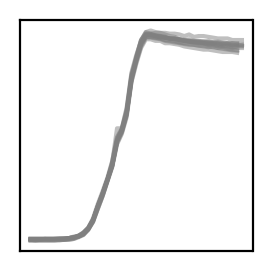

In [23]:
# 実験フロー説明用の図
plot_example_curves("Round01","Cond00012")

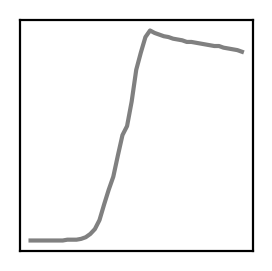

In [24]:
# MaxRate, MaxOD説明用の図
plot_example_curve("Round01","Curve00132")

In [25]:
def create_folder(original_folder_path, new_folder_name):
    new_folder_path = os.path.join(original_folder_path, new_folder_name)
    os.makedirs(new_folder_path, exist_ok=True)
    return new_folder_path+"/"

def plot_allcurves(roundID):
    condition_labels = conditions[conditions["Assay ID"].str.startswith(roundID)]["Condition ID"].values
    condition_labels = list(set(condition_labels))
    condition_labels.sort()

    export_path_round = create_folder(EXPORT_PATH, roundID)
    export_path_round_average = create_folder(EXPORT_PATH, f"{roundID}_on_average_curve")
    for condition_label in condition_labels:
        plot_curves(roundID, condition_label, export_path=export_path_round)
        plot_curves(roundID, condition_label, average=True, export_path=export_path_round_average)

In [26]:
# 全ての曲線を描写
plot_allcurves("Round05")

KeyboardInterrupt: 

<Figure size 400x400 with 0 Axes>

In [345]:
plot_allcurves("Round07")

# 集計

In [27]:
# 培地数
len(set(conditions["Condition ID"]))

1029

In [28]:
# アッセイ数
len(set(conditions["Label"]))

13608

In [29]:
def aggregate_round(roundID, drop=False):
    if drop:
        data = conditions_drop
        curves =curve_set_drop[roundID].dropna(axis=1,how="all")
    else:
        data = conditions
        curves =curve_set[roundID].dropna(axis=1,how="all")
        
    data_round = data[data["Assay ID"].str.startswith(roundID)]
    
    media_num = len(set(data_round["Condition ID"]))
    assay_num = len(data_round)
    curve_num = len(curves.columns)
    
    print(f"{roundID}, media:{media_num}, assay:{assay_num}, valid curve:{curve_num}")

In [30]:
def aggregate_all_round(drop=False):
    for i in range(1,8):
        aggregate_round(f"Round0{i}",drop=drop)

In [31]:
# Roundごとの培地、アッセイ、曲線数
aggregate_all_round()

Round01, media:177, assay:2628, valid curve:2628
Round02, media:177, assay:2640, valid curve:2640
Round03, media:66, assay:960, valid curve:960
Round04, media:177, assay:2640, valid curve:2574
Round05, media:214, assay:2640, valid curve:2498
Round06, media:177, assay:1320, valid curve:1320
Round07, media:63, assay:780, valid curve:780


In [32]:
# Round7（析出削除）の培地、アッセイ、曲線数
aggregate_round(f"Round07",drop=True)

Round07, media:63, assay:780, valid curve:566


In [33]:
def sum_6round():
    conditions_round = conditions[~conditions["Assay ID"].str.startswith("Round07")]
    print(len(set(conditions_round["Condition ID"])))

In [34]:
# Round6までの培地数の確認
sum_6round()

966


In [35]:
def aggregate_curves(roundID):
    conditions_round = conditions[conditions["Assay ID"].str.startswith(roundID)]
    condition_labels = conditions_round["Condition ID"].values
    curves = curve_set[roundID]
    
    for condition in set(condition_labels):
        curve_labels = conditions_round[conditions_round["Condition ID"]==condition]["Label"]
        curve_num = len(set(curves.columns)&set(curve_labels))
        print(f"{condition}:{curve_num}")

In [36]:
# Round5の各Conditionに何本の曲線があったか
aggregate_curves("Round05")

Cond00670:12
Cond00586:12
Cond00635:12
Cond00584:12
Cond00705:12
Cond00759:12
Cond00740:12
Cond00757:12
Cond00630:12
Cond00658:12
Cond00623:12
Cond00599:12
Cond00676:12
Cond00721:12
Cond00606:12
Cond00632:12
Cond00646:12
Cond00674:12
Cond00662:12
Cond00663:12
Cond00603:12
Cond00656:12
Cond00779:12
Cond00769:12
Cond00648:12
Cond00700:12
Cond00694:12
Cond00710:12
Cond00598:12
Cond00626:12
Cond00712:12
Cond00731:12
Cond00622:12
Cond00631:12
Cond00620:12
Cond00747:12
Cond00737:12
Cond00687:12
Cond00675:12
Cond00644:12
Cond00593:12
Cond00697:12
Cond00685:12
Cond00778:12
Cond00739:12
Cond00605:12
Cond00613:12
Cond00588:12
Cond00693:12
Cond00651:12
Cond00744:12
Cond00653:12
Cond00609:12
Cond00589:12
Cond00612:12
Cond00650:12
Cond00607:12
Cond00719:12
Cond00726:12
Cond00735:12
Cond00742:12
Cond00761:12
Cond00765:12
Cond00602:12
Cond00611:12
Cond00723:12
Cond00770:12
Cond00659:12
Cond00750:12
Cond00666:12
Cond00736:12
Cond00752:12
Cond00763:12
Cond00701:12
Cond00774:12
Cond00640:12
Cond00684:12

In [37]:
def print_minmaxtime_and_maxmaxtime():
    maxtimes=[]
    for col in allcurve.columns:
        curve = allcurve[col]
        curve = curve.dropna()
        try:
            maxtime = curve.tail(1).index.values[0]
            maxtimes.append(maxtime)
        except:
            pass
    maxtimes = pd.Series(maxtimes)
    print(maxtimes.min(),maxtimes.max())

In [38]:
# 測定時間のレンジ
print_minmaxtime_and_maxmaxtime()

18.0 48.5


# 論文Figureの描写

In [39]:
# valid（info = 0）だけplot
def plot_hist(param):
    data_valid = conditions[conditions[f"{param}_info"]==0]
    params = data_valid[param]
    
    fig,ax = plt.subplots(figsize=(2,2))
    plt.hist(params,bins=20)
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.savefig(EXPORT_PATH + f"{param}_hist.pdf", dpi=200, bbox_inches="tight")

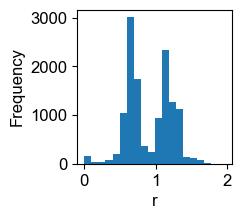

In [40]:
plot_hist("r")

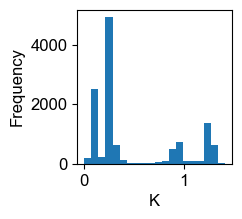

In [41]:
plot_hist("K")

In [42]:
def plot_density():
    data_valid = conditions[(conditions["K_info"]==0)&(conditions["r_info"]==0)]
    
    fig,ax = plt.subplots(figsize=(2.5,2))
    H = plt.hist2d(data_valid["K"], data_valid["r"], bins=40, norm=matplotlib.colors.LogNorm(), cmap=cm.jet)
    plt.xlabel("K (a.u.)")
    plt.ylabel("r ($\mathrm{h^{-1}}$)")
    plt.xlim(-0.05, 1.45)
    plt.ylim(-0.05, 2.0)
    fig.colorbar(H[3],ax=ax)
    plt.savefig(EXPORT_PATH + f"K_r_density.pdf", dpi=200, bbox_inches="tight")
    
def corr():
    data_valid = conditions[(conditions["K_info"]==0)&(conditions["r_info"]==0)]
    r,p = spearmanr(data_valid["K"], data_valid["r"])
    print(r, p)

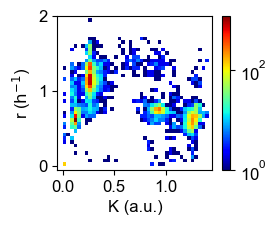

In [43]:
plot_density()

In [13]:
corr()

-0.024702503527219716 0.006626582558697676
